## KDD Cup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.io import loadmat
from utils.utils_gmm import *
from sklearn.preprocessing import MinMaxScaler


sns.set_style('darkgrid')

SEED = 42

np.random.seed(SEED)
sns.set()

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load Data

In [3]:
names = "duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate".split(",")
features = names
df = pd.read_csv("data/kdd99-unsupervised-ad.csv", names=np.append(names, "label"))
df.head(5)

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,215.0,45076.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
2,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
3,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
4,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n


In [4]:
# extraxt features and target
Y = df["label"]
Y = (Y == "o").astype("int").values

X = df.values[:, :-1]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Y.shape, X_scaled.shape

((620098,), (620098, 29))

In [ ]:
#find best components
aucs = gridsearch_n(X, Y, min_n=3, max_n=10, plot=True, SEED=SEED)

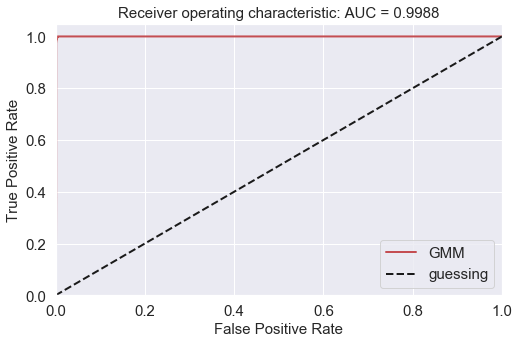

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,score,label
522809,41065,1,0,0,0,0,0,0,0,0,...,0.01,0.32,0.62,0,0,0,0.62,1,289452.954580,1
370303,0,143,11993,21,1,21,0,0,0,0,...,1,0,0.11,0.02,0,0,0,0,150913.340677,0
100615,0,301,325,0,1,0,0,0,1,0,...,1,0,1,0.06,0,0,0,0,46823.288136,0
61448,0,303,325,0,1,0,0,0,1,0,...,1,0,0.02,0.03,0,0,0,0,46817.573328,0
412,0,231,325,0,1,0,0,0,1,0,...,1,0,0.33,0.05,0,0,0,0,46816.716866,0
61406,0,303,325,0,1,0,0,0,1,0,...,1,0,0.33,0.03,0,0,0,0,46815.581949,0
32508,0,231,325,0,1,0,0,0,1,0,...,1,0,0.33,0.04,0,0,0,0,46815.501905,0
133373,0,301,325,0,1,0,0,0,1,0,...,1,0,0.33,0.04,0,0,0,0,46815.501133,0
301540,0,307,619,0,1,0,0,1,0,0,...,1,0,0.05,0.04,0,0,0,0,35951.026221,0
293034,0,251,347,0,1,0,0,1,0,0,...,1,0,0.2,0.07,0,0,0,0,35950.741412,0


In [5]:
N_COMPONENTS = 3

scores, gm = fit_predict_gm(X, N_COMPONENTS, SEED=SEED)

scored_df = pd.DataFrame(X)
scored_df.columns = df.columns[:-1]
scored_df.index = df.index 
scored_df["score"] = scores
scored_df["label"] = Y

plot_roc_curve(scored_df)

sorted_df = scored_df.sort_values(by="score", ascending=False)
sorted_df.head(20)

### Calculate distances per dimension

In [6]:
dist, cs = mah_dist_per_dim(gm, X, sorted_df.index.values)
distances = pd.DataFrame(dist, columns=df.columns[:-1])
distances.index = sorted_df.index
distances.head(5)

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
522809,761.019992,0.062008,0.962944,0.104298,4.914313,0.030629,0.054127,0.008254,0.010072,0.228754,...,2.010267,2.597793,13.850320,2.831886,2.421127,0.632635,0.326937,0.483375,1.562767,3.307219
370303,0.026721,5.711025,2.378515,33.559157,5.765680,550.417714,0.195029,0.004612,0.009091,0.192871,...,1.385302,0.619157,0.057493,0.090233,0.505876,0.667967,0.405350,0.182056,2.264768,1.091448
100615,0.019724,0.035304,0.186120,0.070282,0.300458,0.021821,0.022560,0.003297,306.040527,0.040312,...,1.319485,0.158574,0.169299,0.089472,4.788620,0.318514,0.123321,0.087055,0.732742,0.485723
61448,0.014496,0.014556,0.087325,0.040181,0.221321,0.021994,0.011772,0.002551,306.055336,0.042088,...,0.643157,0.066329,0.133224,0.050128,0.841865,0.057375,0.092334,0.056075,0.527653,0.409530
412,0.008012,0.025253,0.034682,0.017691,0.285731,0.021141,0.006411,0.001984,306.051881,0.040284,...,0.362733,0.109187,0.083408,0.073939,0.697216,0.426082,0.050078,0.102604,0.208752,0.366024


### Store Results

In [7]:
outlier_idx = sorted_df[sorted_df["label"] == 1].index
outlier_idx = outlier_idx[np.argsort(outlier_idx)]

#oorted_df.loc[outlier_idx].to_csv("results/gmm_kdd_cup_scored.csv")
#distances.loc[outlier_idx].to_csv("results/gmm_kdd_cup_distances.csv")

### Examine Results

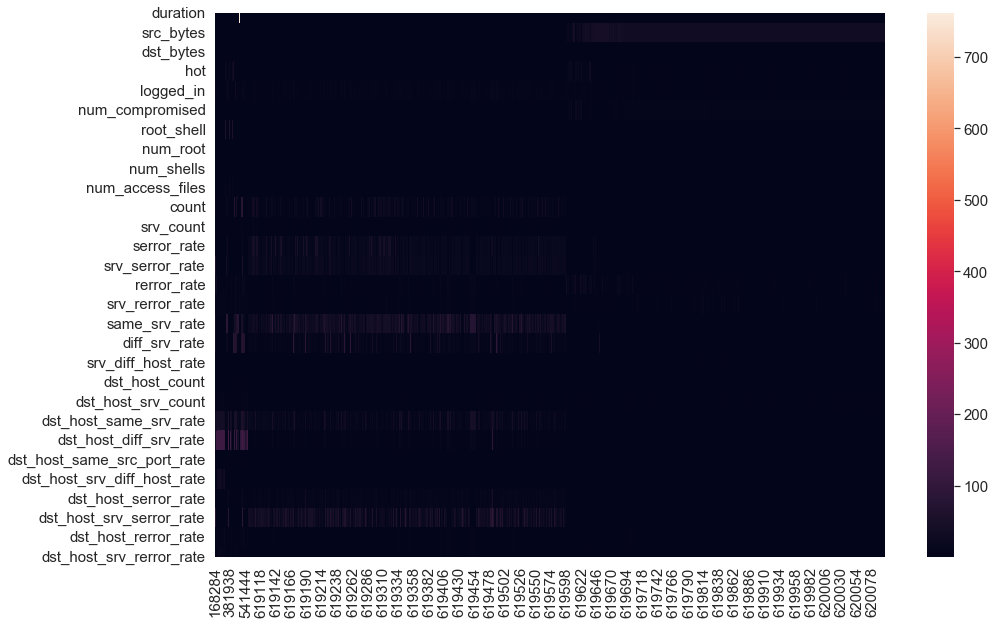

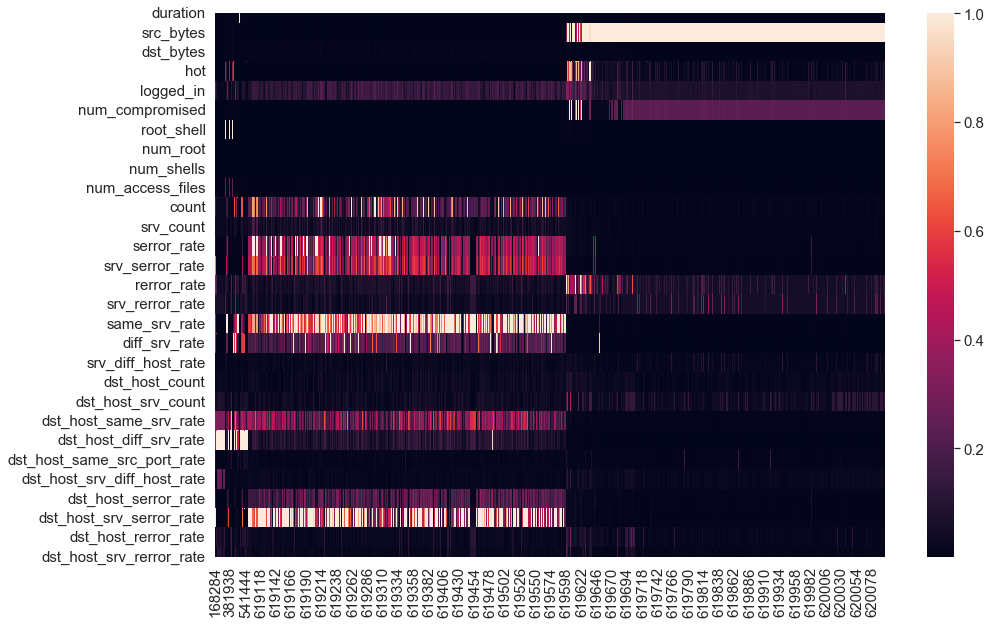

In [8]:
plt.figure(figsize=[15, 10])
sns.heatmap(distances.loc[outlier_idx].T)
plt.show()
plt.figure(figsize=[15, 10])
distances_norm = distances.loc[outlier_idx].T / np.max(distances.loc[outlier_idx].T.values, axis=0)
sns.heatmap(distances_norm)

<BarContainer object of 5 artists>

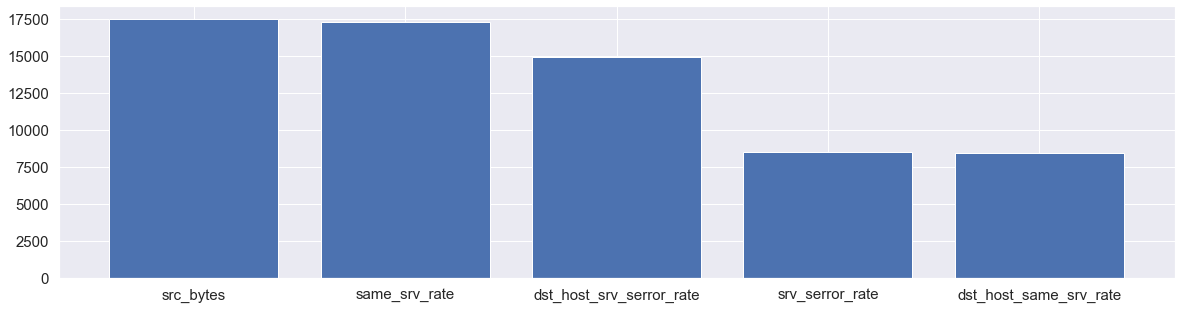

In [9]:
TOP_COLUMNS = 5
plt.figure(figsize=[20, 5])
dist_sum = distances.loc[outlier_idx].sum().sort_values(ascending=False)[:TOP_COLUMNS]
plt.bar(dist_sum.index, dist_sum.values)

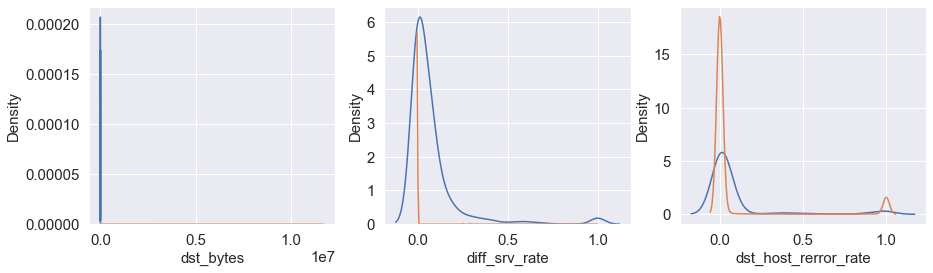

In [15]:
# plot the density estimation for the top 3 feautres for the inlier and outlier class
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, c in zip(axes, dist_sum.index[:3].values):
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax)
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax)

[0.99924361 0.11172191]


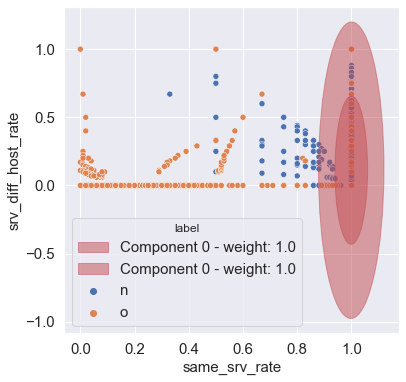

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

columns_i = dist_sum.index[:2].values
columns_i = ["same_srv_rate", "srv_diff_host_rate"]

col_1 = columns_i[0]
col_2 = columns_i[1]

columns = df.columns[:-1]
col_1_idx = np.argsort(columns == col_1)[-1]
col_2_idx = np.argsort(columns == col_2)[-1]

#draw_components(gm, [col_1_idx, col_2_idx], ax=ax)
cols = [col_1_idx, col_2_idx]
w_factor = 0.5 
c = 0
for idx, (pos, covar, w) in enumerate(zip(gm.means_[[c]][:, cols], gm.covariances_[[c]][:, cols, :][:, :, cols], gm.weights_[[c]])):
        print(pos)
        draw_ellipse(pos, covar, alpha=0.5, ax=ax, c="r", nr_patches=3, label=f"Component {c} - weight: {round(w, 2)}")


sns.scatterplot(data=df, x=columns_i[0], y=columns_i[1], hue="label", ax=ax)

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.000089,-0.000888,-0.000156,-0.000790,-0.000112,-0.000155,-0.000042,-0.000036,0.000602,...,0.004888,-0.009428,-0.043300,0.048297,0.004030,-0.003664,0.000136,-0.000312,-0.000765,0.001688
src_bytes,0.000089,1.000000,0.006190,0.538922,0.057514,0.546163,0.000018,-0.000064,-0.000004,-0.000066,...,0.022436,-0.054639,0.007454,-0.004373,-0.027107,-0.052368,-0.005588,-0.005103,-0.049286,-0.047707
dst_bytes,-0.000888,0.006190,1.000000,0.026458,0.053452,0.008569,0.036420,-0.000166,-0.000496,-0.000127,...,-0.010226,0.012635,0.007432,-0.002863,-0.003152,-0.028394,-0.001306,-0.003996,-0.051251,-0.049313
hot,-0.000156,0.538922,0.026458,1.000000,0.015801,0.625463,0.201673,-0.000183,-0.000159,-0.001971,...,-0.002587,-0.037167,0.003253,-0.002093,0.007278,-0.015218,0.009170,0.000095,-0.010873,-0.011824
logged_in,-0.000790,0.057514,0.053452,0.015801,1.000000,0.006424,0.005523,0.001113,0.000964,0.022846,...,0.297357,0.292627,0.108111,-0.051531,-0.356779,-0.693121,-0.085615,-0.086333,-0.962648,-0.935804
num_compromised,-0.000112,0.546163,0.008569,0.625463,0.006424,1.000000,0.005577,-0.000074,-0.000064,-0.001529,...,-0.000743,-0.038973,0.001973,-0.001696,-0.002234,-0.011058,-0.001067,-0.000636,-0.003031,-0.003247
root_shell,-0.000155,0.000018,0.036420,0.201673,0.005523,0.005577,1.000000,-0.000064,-0.000055,0.003620,...,0.009431,0.003582,0.001451,-0.001205,-0.005834,-0.006888,-0.000673,-0.000840,-0.005687,-0.005434
num_root,-0.000042,-0.000064,-0.000166,-0.000183,0.001113,-0.000074,-0.000064,1.000000,-0.000011,-0.000265,...,-0.003644,0.000933,0.000353,-0.000300,0.000005,0.000668,-0.000225,-0.000189,-0.001146,-0.001160
num_shells,-0.000036,-0.000004,-0.000496,-0.000159,0.000964,-0.000064,-0.000055,-0.000011,1.000000,-0.000229,...,-0.003467,0.000808,0.000306,-0.000260,0.005278,0.000604,-0.000195,-0.000163,-0.000992,-0.001005
num_access_files,0.000602,-0.000066,-0.000127,-0.001971,0.022846,-0.001529,0.003620,-0.000265,-0.000229,1.000000,...,0.068797,-0.027493,-0.091638,0.097787,-0.026023,-0.042932,-0.000637,-0.002392,-0.022965,-0.023271


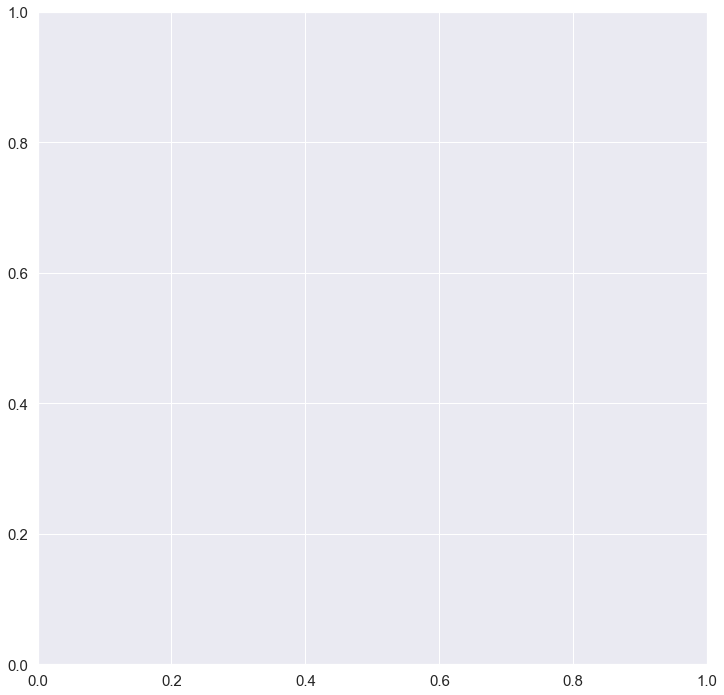

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.corr()